In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# SENTIMENT ANALYSIS OF TWEETS FROM AIRLINE USERS

In [2]:
# objective: 

# 1. which airline provides the good service(Most prefered)-Based on sentiment confidence
# 2.Reasons for the negative reviews
# 3.Points for improvements
#4.apply machine learning model

In [3]:
df=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\Edubridge\\Tweets.csv")

In [4]:

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
(df.isna().sum()/df.shape[0])*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [7]:
df.shape

(14640, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# DATA CLEANING

In [9]:
# Unnecessory columns from the data has been excluded

# tweet id: Insignificant
# airline_sentiment_gold:40 non null values/14640 entries(0.27% of data)
# name:Insignificant 
# neagativereason_gold:32 non null values/14640 entries(0.22% of data)
# retweet_count:Insignificant
# tweet_coord:Insignificant
# tweet_location:Insignificant
# user_timezone:Insignificant    
    
    

In [10]:
#droping unwanted columns

df.drop(["tweet_id","airline_sentiment_gold","name","negativereason_gold","retweet_count","tweet_coord","tweet_location","user_timezone"],axis=1,inplace=True)

In [11]:

df.duplicated().sum()

39

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

data shape after removing columns

In [14]:
df.shape

(14601, 7)

# NULL VALUES

we have null values in coulumns "negativereason" & "negativereason_confidence "  but  the replacement will affect the correctness of the data

In [15]:


df.isna().sum()

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5444
negativereason_confidence       4100
airline                            0
text                               0
tweet_created                      0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14601 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14601 non-null  object 
 1   airline_sentiment_confidence  14601 non-null  float64
 2   negativereason                9157 non-null   object 
 3   negativereason_confidence     10501 non-null  float64
 4   airline                       14601 non-null  object 
 5   text                          14601 non-null  object 
 6   tweet_created                 14601 non-null  object 
dtypes: float64(2), object(5)
memory usage: 912.6+ KB


In [17]:
#  The mode value for negative reason is Customer Service Issue 

In [18]:
df.negativereason.value_counts()

Customer Service Issue         2902
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

# CHECKING OUTLIERS IN THE NUMERICAL DATA COLUMNS-"negativereason_confidence" AND "airline_sentiment_confidence"

C:\Users\DELL\anaconda-hari\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


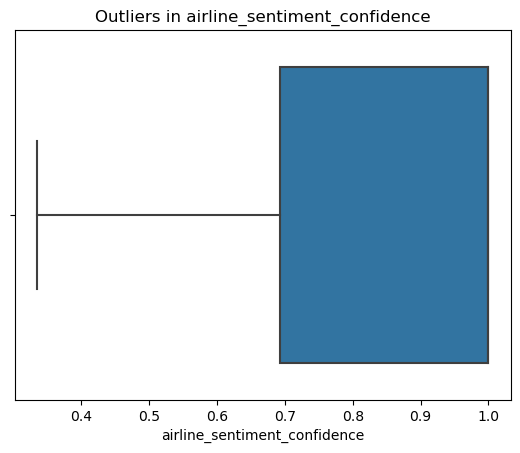

In [19]:
sns.boxplot(df["airline_sentiment_confidence"])
plt.title("Outliers in airline_sentiment_confidence")
plt.show()

C:\Users\DELL\anaconda-hari\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


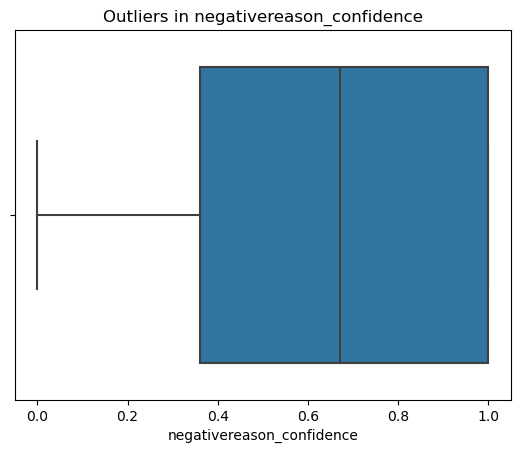

In [20]:
sns.boxplot(df["negativereason_confidence"])
plt.title("Outliers in negativereason_confidence")
plt.show()

# Preprocessing “tweet_created” date

tweet_created is in object format need to change it to date format

In [21]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14601 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   airline_sentiment             14601 non-null  object                                
 1   airline_sentiment_confidence  14601 non-null  float64                               
 2   negativereason                9157 non-null   object                                
 3   negativereason_confidence     10501 non-null  float64                               
 4   airline                       14601 non-null  object                                
 5   text                          14601 non-null  object                                
 6   tweet_created                 14601 non-null  datetime64[ns, pytz.FixedOffset(-480)]
dtypes: datetime64[ns, pytz.FixedOffset(-480)](1), float64(2), object(4)
memory us

In [23]:
df['tweet_created'].min()

Timestamp('2015-02-16 23:36:05-0800', tz='pytz.FixedOffset(-480)')

In [24]:
df['tweet_created'].max()

Timestamp('2015-02-24 11:53:37-0800', tz='pytz.FixedOffset(-480)')

# saving cleaned file

In [25]:
df.to_csv("airlinecleand.csv")

In [26]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00


In [27]:
df.negativereason.value_counts()

Customer Service Issue         2902
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [28]:
df.shape

(14601, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14601 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   airline_sentiment             14601 non-null  object                                
 1   airline_sentiment_confidence  14601 non-null  float64                               
 2   negativereason                9157 non-null   object                                
 3   negativereason_confidence     10501 non-null  float64                               
 4   airline                       14601 non-null  object                                
 5   text                          14601 non-null  object                                
 6   tweet_created                 14601 non-null  datetime64[ns, pytz.FixedOffset(-480)]
dtypes: datetime64[ns, pytz.FixedOffset(-480)](1), float64(2), object(4)
memory us

In [30]:
df.negativereason.unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

# DATA VISUALISATION-EDA

# counting types of sentiments


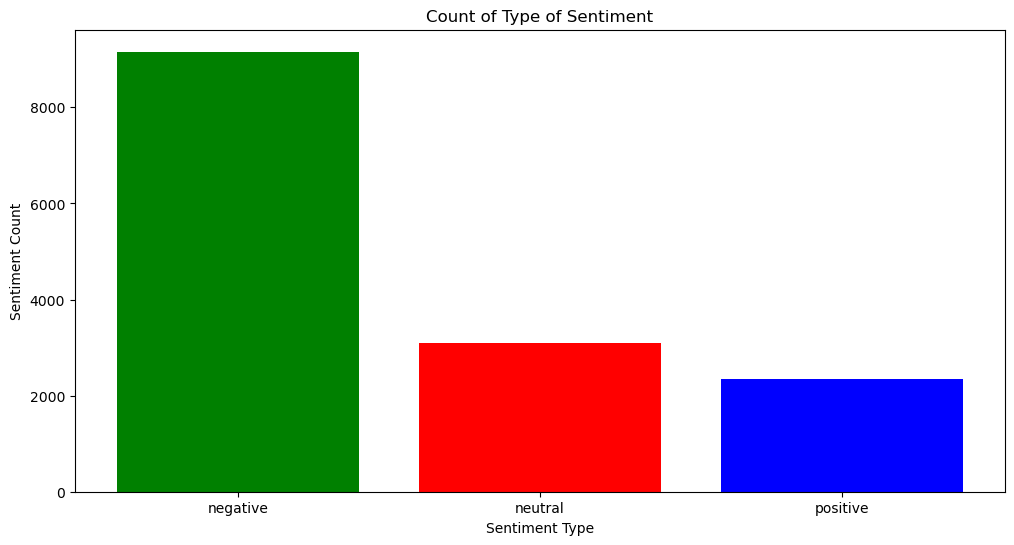

In [31]:
counter = df.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')
plt.show()

In [32]:
df.airline_sentiment.value_counts()

negative    9157
neutral     3091
positive    2353
Name: airline_sentiment, dtype: int64

# Airline sentiments for each airline

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2720
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


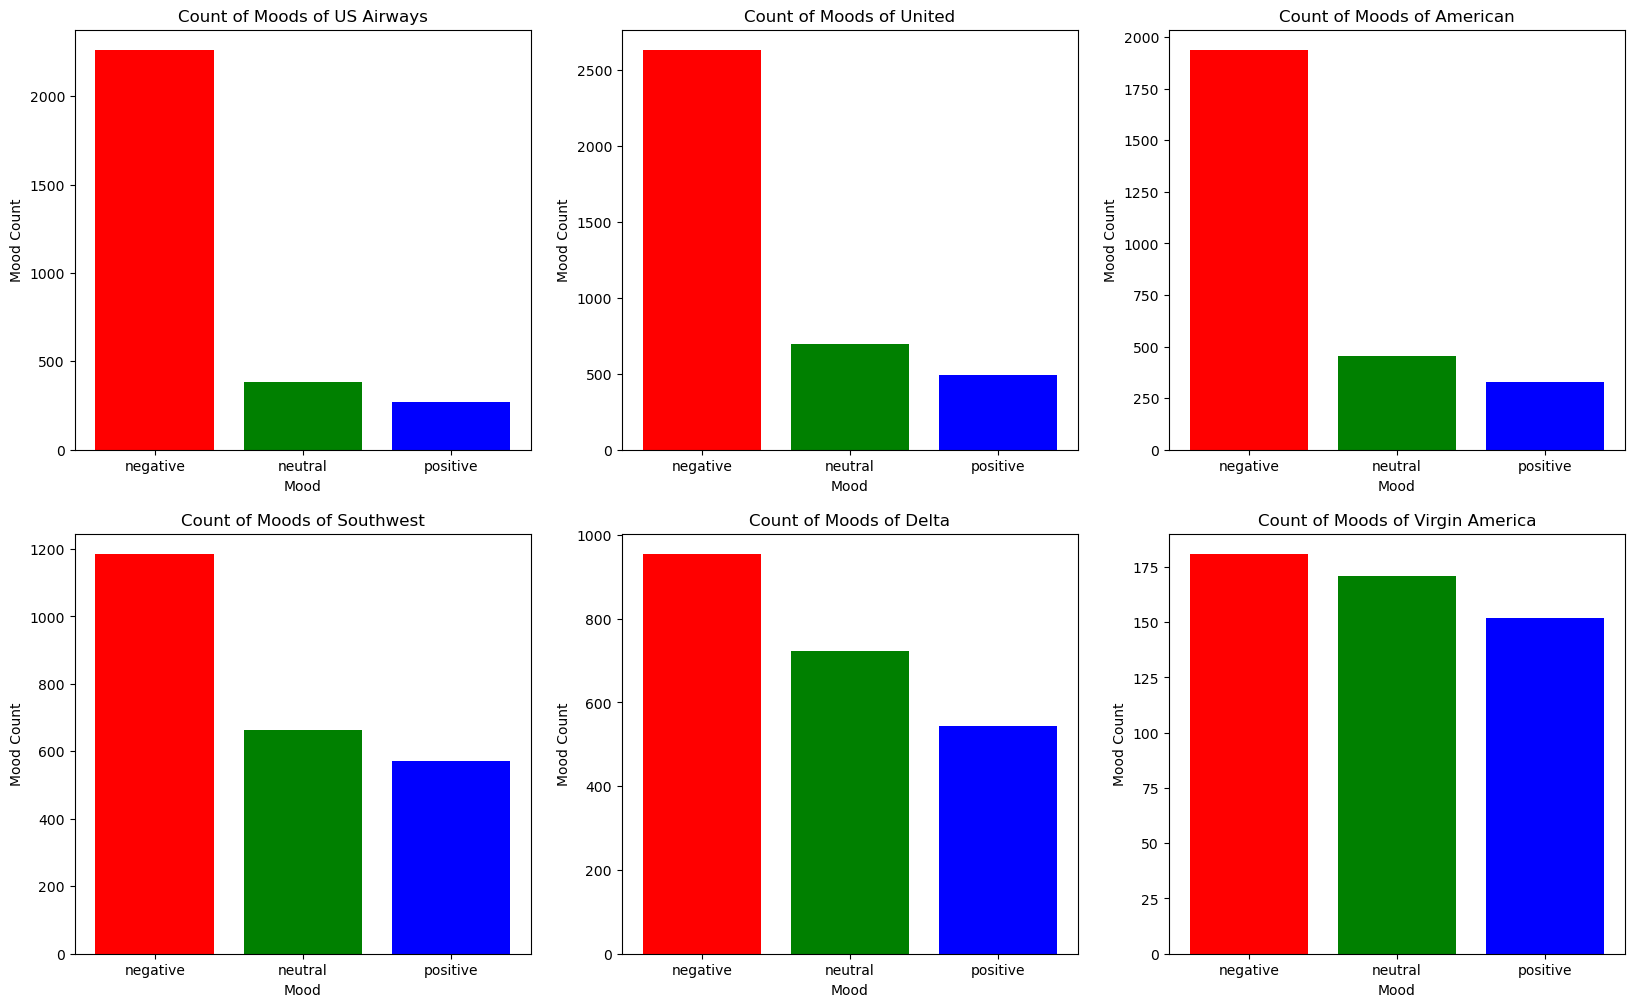

In [33]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(20, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

C:\Users\DELL\anaconda-hari\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

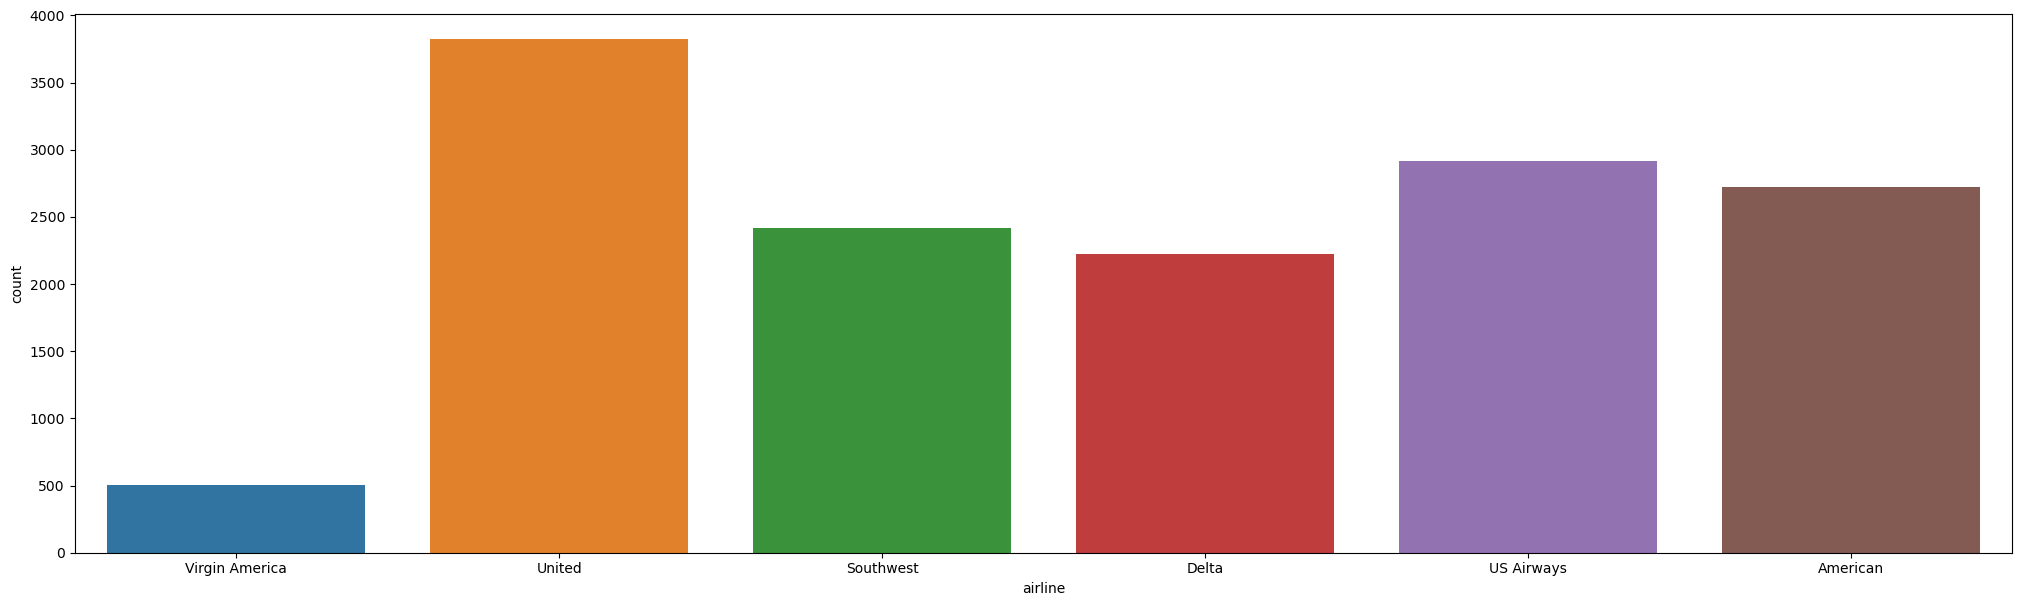

In [34]:
plt.figure(figsize=(25,7))
sns.countplot(df.airline)

In [35]:
# united has recorded the highest number of reviews
#Virgin has the lowest number of reviews

percentage of negative reviews

            Percent Negative
American            0.712868
Delta               0.429793
Southwest           0.490083
US Airways          0.776862
United              0.688906
Virgin              0.359127


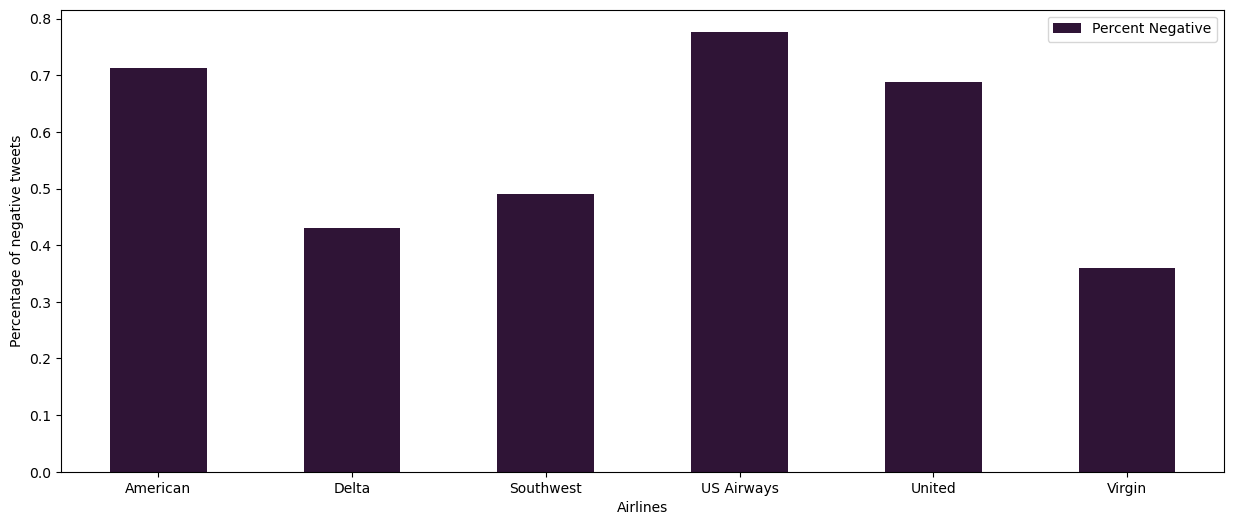

In [36]:
neg_tweets = df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = df.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'twilight_shifted_r', figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

<AxesSubplot:xlabel='airline'>

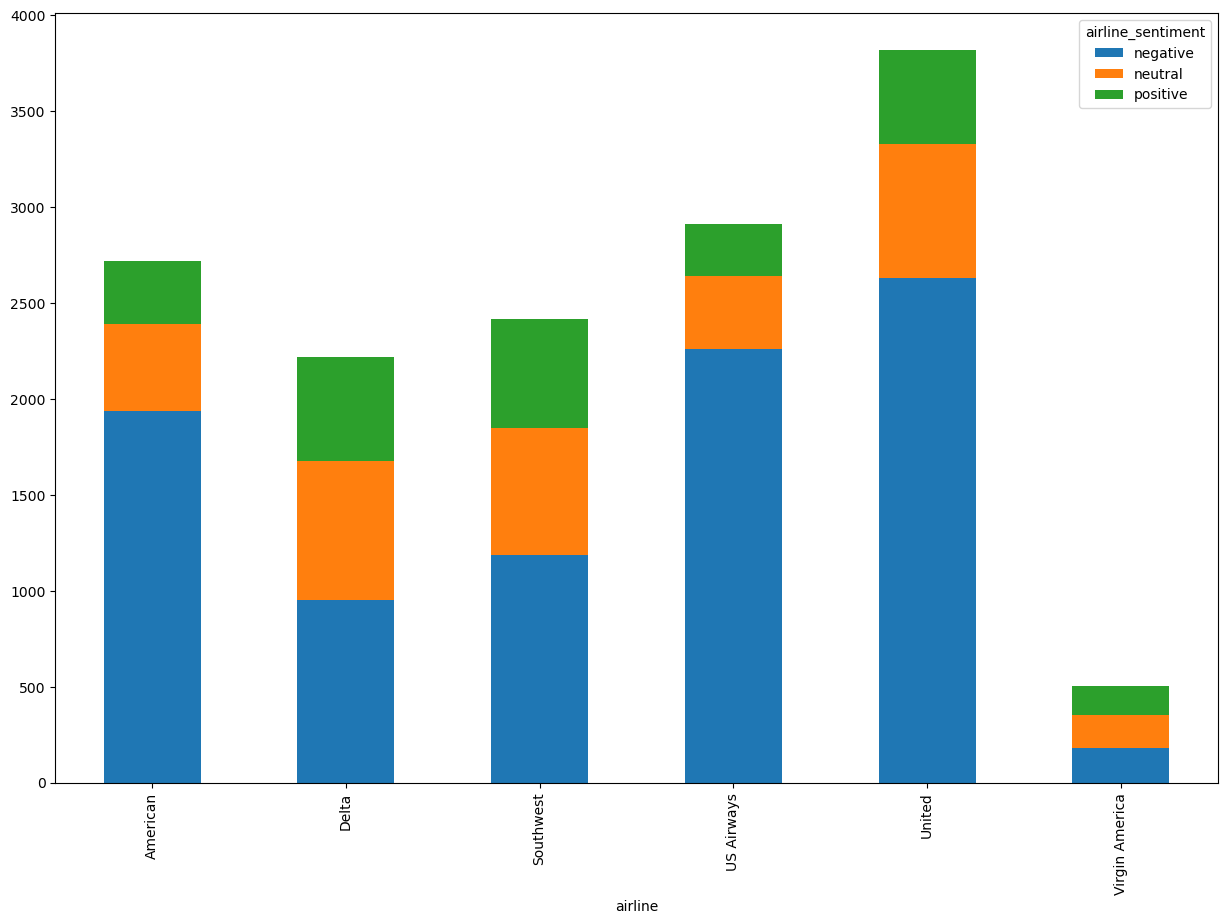

In [37]:
figure_2 = df.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [38]:
print(figure_2)

airline         airline_sentiment
American        negative             1939
                neutral               455
                positive              326
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


# Reasons for negative reviews.

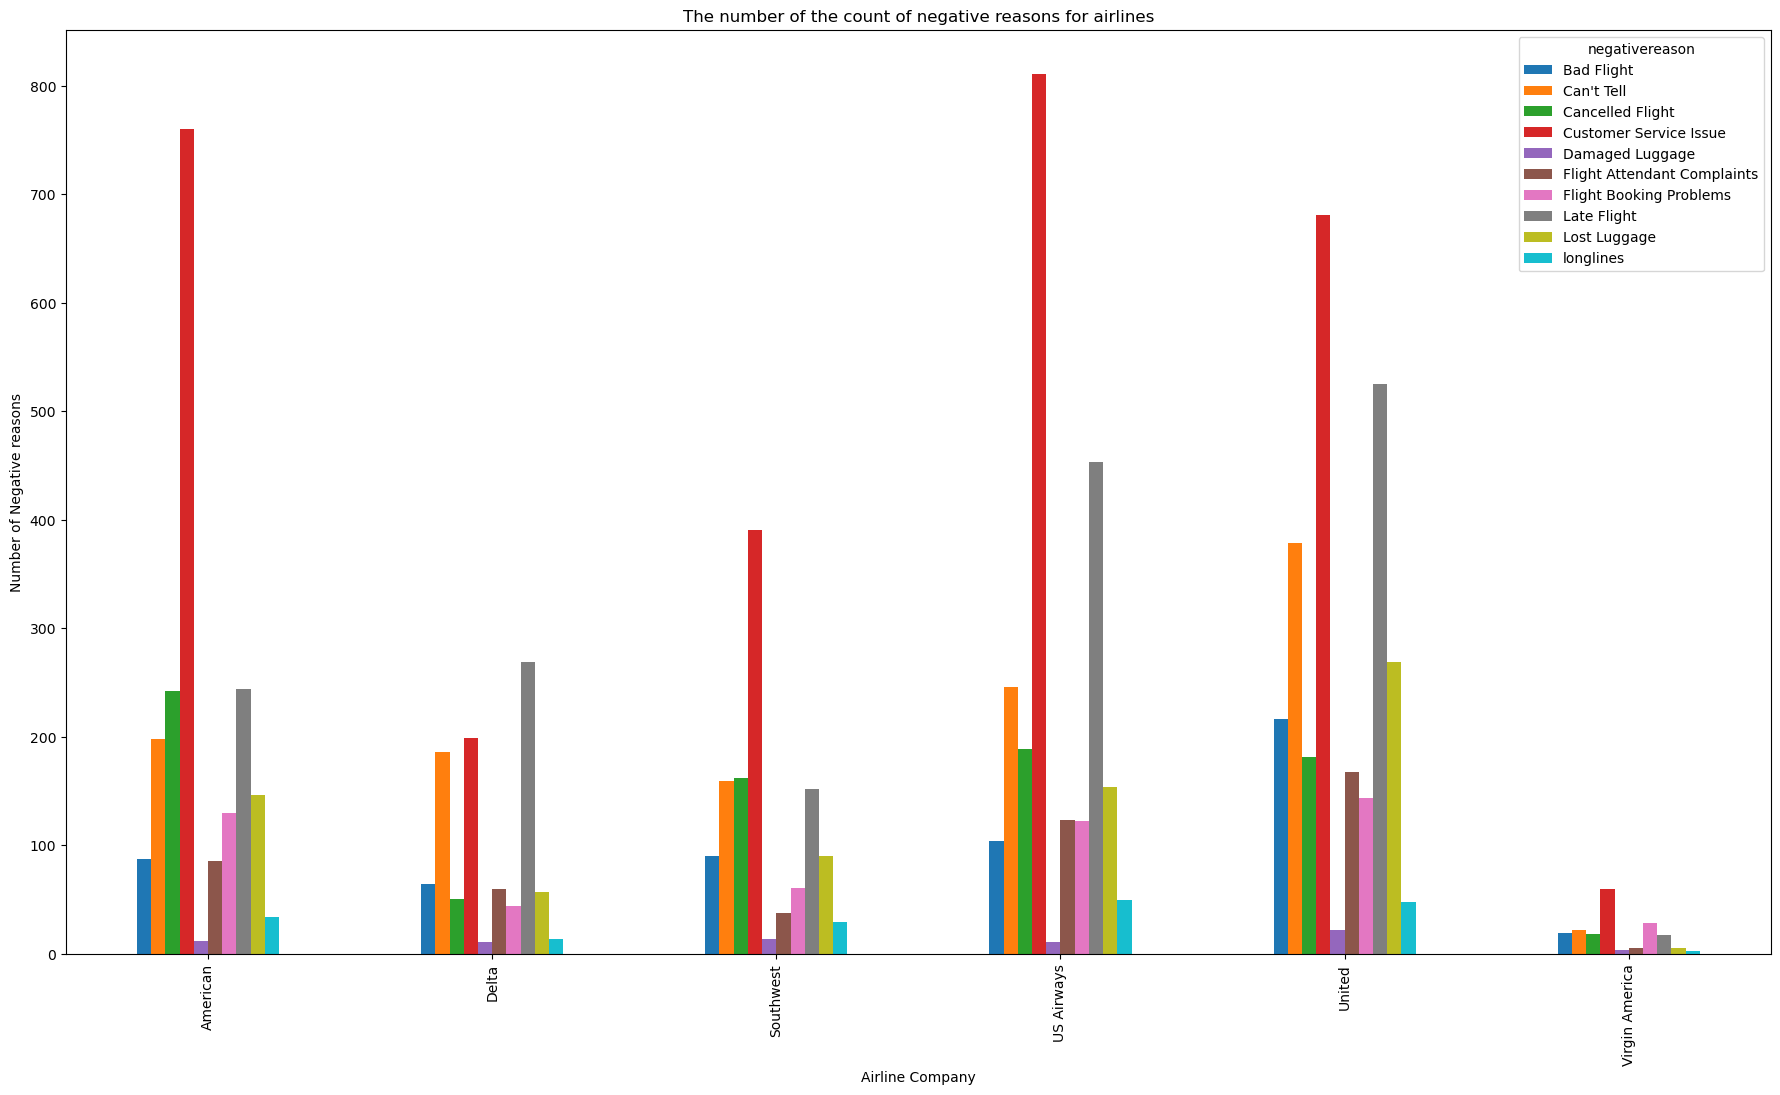

In [39]:
negative_reasons = df.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

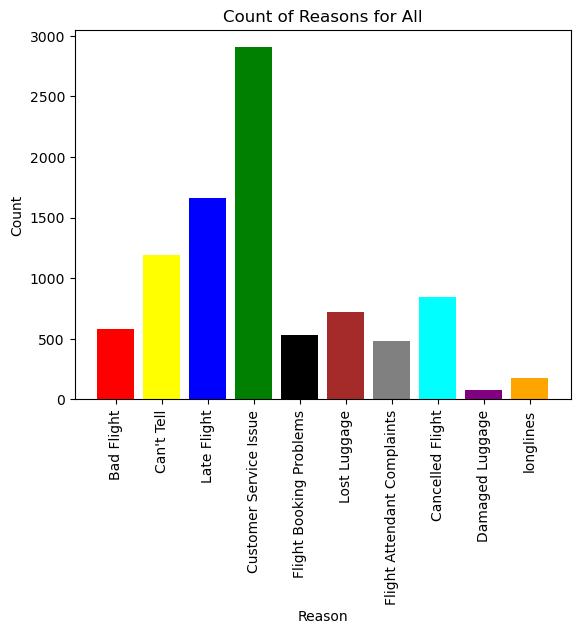

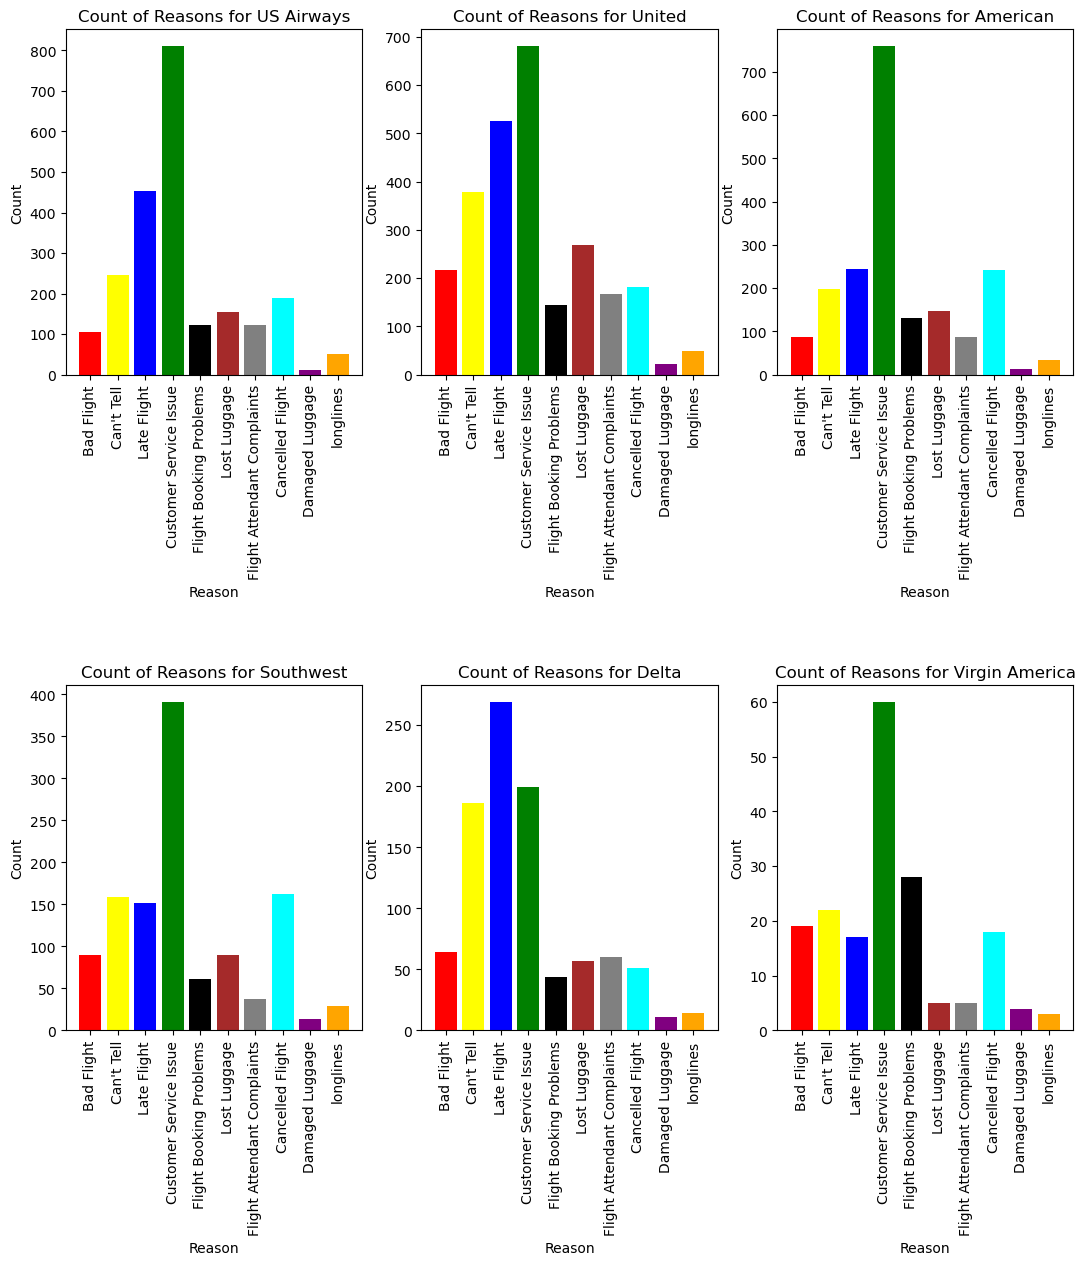

In [40]:
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [41]:
# Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America
# Late Flight is the main negative reason for Delta
# Interestingly, Virgin America has the least count of negative reasons (all less than 60)
# Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)

# Preprocessing 

1. tweet text data

In [42]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [43]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

1)re.sub("[^a-zA-Z]", " ", tweet) uses regular expressions to replace all non-letter characters (symbols, numbers, etc.) with a space character. This effectively removes all non-alphabetic characters from the tweet.


2).lower() converts all characters in the tweet to lowercase.


3).split() splits the tweet into individual words based on whitespace (spaces, tabs, line breaks, etc.).


4)set(stopwords.words("english")) loads a set of stopwords for the English language from the Natural Language Toolkit (NLTK) library.

5)w for w in words if not w in stops] iterates over all words in the tweet and only keeps those that are not in the stopwords set.


6)" ".join(meaningful_words) joins the remaining words back into a string, separated by a space character.

In [44]:
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))

In [45]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,clean_tweet
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,virginamerica dhepburn said
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,virginamerica plus added commercials experienc...
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,virginamerica today must mean need take anothe...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,virginamerica really aggressive blast obnoxiou...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,virginamerica really big bad thing


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['airline_sentiment'])

df['airline_sentiment_encoded'] = le.transform(df['airline_sentiment'])

le.fit(df["clean_tweet"])
df["tweet_encoded"]=le.transform(df["clean_tweet"])


# MACHINE LEARNING MODELS

# Support vector Machine

In [47]:
x = df.clean_tweet
y = df.airline_sentiment_encoded

print(len(x), len(y))

14601 14601


In [48]:
y.value_counts()

0    9157
1    3091
2    2353
Name: airline_sentiment_encoded, dtype: int64

The data is not balanced if i apply the balancing with imb learn  requires 2D array data.  So can not apply the SVM.since v vectorisation is not possible To take care ofit creating four combination of data based on airline sentiment.

that is 

1. Data frame   containing positive and negative= dfn

2.Data frame containing positive and neutral=dfpn

3.Data frame containing  neagative and neutral=dfnn

4 The orginal data frame=df

In [49]:
dfn=df.drop(df.loc[df['airline_sentiment']=='neutral'].index)

In [50]:
dfpn=df.drop(df.loc[df['airline_sentiment']=='negative'].index)

In [51]:
dfnn=df.drop(df.loc[df['airline_sentiment']=='positive'].index)


DFN=Data frame   containing positive and negative

In [52]:
dfn.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,clean_tweet,airline_sentiment_encoded,tweet_encoded
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,virginamerica plus added commercials experienc...,2,14097
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,virginamerica really aggressive blast obnoxiou...,0,14113
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,virginamerica really big bad thing,0,14114
5,negative,1.0000,Can't Tell,0.6842,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33-08:00,virginamerica seriously would pay flight seats...,0,14139
6,positive,0.6745,NaN,0.0000,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57-08:00,virginamerica yes nearly every time fly vx ear...,2,14255


In [53]:
xfn = dfn.clean_tweet
yfn = dfn.airline_sentiment


In [54]:
xfn_train, xfn_test, yfn_train, yfn_test = train_test_split(xfn, yfn, random_state=42,test_size=.2)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer


In [56]:
vectfn = CountVectorizer()
vectfn.fit(xfn_train)

CountVectorizer()

In [57]:
xfn_train_dtm = vectfn.transform(xfn_train)
xfn_test_dtm = vectfn.transform(xfn_test)

In [58]:
from sklearn.svm import SVC
modelfn = SVC(kernel='linear', random_state = 10,decision_function_shape='ovr')
modelfn.fit(xfn_train_dtm, yfn_train)

SVC(kernel='linear', random_state=10)

In [59]:
predfn = modelfn.predict(xfn_test_dtm)

In [60]:
#accuracy score
accuracy_score(yfn_test,predfn)

0.9096437880104257

In [61]:
#building confusion matrix
cmfn = confusion_matrix(yfn_test, predfn)
cmfn

array([[1758,   86],
       [ 122,  336]], dtype=int64)

In [62]:
print(classification_report(yfn_test,predfn))

              precision    recall  f1-score   support

    negative       0.94      0.95      0.94      1844
    positive       0.80      0.73      0.76       458

    accuracy                           0.91      2302
   macro avg       0.87      0.84      0.85      2302
weighted avg       0.91      0.91      0.91      2302



DFPN=Data frame containing positive and neutral

In [63]:
dfpn.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,clean_tweet,airline_sentiment_encoded,tweet_encoded
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,virginamerica dhepburn said,1,13861
1,positive,0.3486,NaN,0.0,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,virginamerica plus added commercials experienc...,2,14097
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,virginamerica today must mean need take anothe...,1,14199
6,positive,0.6745,NaN,0.0,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57-08:00,virginamerica yes nearly every time fly vx ear...,2,14255
7,neutral,0.6340,NaN,NaN,Virgin America,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29-08:00,virginamerica really missed prime opportunity ...,1,14117


In [64]:
xfpn = dfpn.clean_tweet
yfpn = dfpn.airline_sentiment


In [65]:
xfpn_train, xfpn_test, yfpn_train, yfpn_test = train_test_split(xfpn, yfpn, random_state=42,test_size=.2,)

In [66]:
vectfpn = CountVectorizer()
vectfpn.fit(xfpn_train)

CountVectorizer()

In [67]:
xfpn_train_dtm = vectfpn.transform(xfpn_train)
xfpn_test_dtm = vectfpn.transform(xfpn_test)

In [68]:
modelfpn = SVC(kernel='linear', random_state = 10,decision_function_shape='ovr')
modelfpn.fit(xfpn_train_dtm, yfpn_train)

SVC(kernel='linear', random_state=10)

In [69]:
predfpn = modelfpn.predict(xfpn_test_dtm)

In [70]:
#accuracy score
accuracy_score(yfpn_test,predfpn)

0.8154269972451791

In [71]:
cmfpn = confusion_matrix(yfpn_test, predfpn)
cmfpn

array([[521,  91],
       [110, 367]], dtype=int64)

In [72]:
print(classification_report(yfpn_test,predfpn))

              precision    recall  f1-score   support

     neutral       0.83      0.85      0.84       612
    positive       0.80      0.77      0.79       477

    accuracy                           0.82      1089
   macro avg       0.81      0.81      0.81      1089
weighted avg       0.82      0.82      0.81      1089



DFNN=Data frame containg  neagative and neutral

In [73]:
dfnn.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,clean_tweet,airline_sentiment_encoded,tweet_encoded
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,virginamerica dhepburn said,1,13861
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,virginamerica today must mean need take anothe...,1,14199
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,virginamerica really aggressive blast obnoxiou...,0,14113
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,virginamerica really big bad thing,0,14114
5,negative,1.0000,Can't Tell,0.6842,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33-08:00,virginamerica seriously would pay flight seats...,0,14139


In [74]:
xfnn = dfnn.clean_tweet
yfnn = dfnn.airline_sentiment


In [75]:
xfnn_train, xfnn_test, yfnn_train, yfnn_test = train_test_split(xfnn, yfnn, random_state=42,test_size=.2)

In [76]:
vectfnn = CountVectorizer()
vectfnn.fit(xfnn_train)

CountVectorizer()

In [77]:
xfnn_train_dtm = vectfpn.transform(xfnn_train)
xfnn_test_dtm = vectfpn.transform(xfnn_test)

In [78]:
modelfnn = SVC(kernel='linear', random_state = 10,decision_function_shape='ovr')
modelfnn.fit(xfnn_train_dtm, yfnn_train)

SVC(kernel='linear', random_state=10)

In [79]:
predfnn = modelfnn.predict(xfnn_test_dtm)

In [80]:
#accuracy score
accuracy_score(yfnn_test,predfnn)

0.8138775510204082

In [81]:
cmfnn = confusion_matrix(yfnn_test, predfnn)
cmfnn

array([[1631,  197],
       [ 259,  363]], dtype=int64)

In [82]:
print(classification_report(yfnn_test,predfnn))

              precision    recall  f1-score   support

    negative       0.86      0.89      0.88      1828
     neutral       0.65      0.58      0.61       622

    accuracy                           0.81      2450
   macro avg       0.76      0.74      0.75      2450
weighted avg       0.81      0.81      0.81      2450



DF

In [83]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,clean_tweet,airline_sentiment_encoded,tweet_encoded
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,virginamerica dhepburn said,1,13861
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,virginamerica plus added commercials experienc...,2,14097
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,virginamerica today must mean need take anothe...,1,14199
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,virginamerica really aggressive blast obnoxiou...,0,14113
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,virginamerica really big bad thing,0,14114


In [84]:
x = df.clean_tweet
y = df.airline_sentiment


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=.2)

 CountVectorizer is a text preprocessing module from the scikit-learn library in Python, which converts a collection of text documents to a matrix of token counts.


Token	            Document 1	            Document 2	                         Document 3

apple	              2	                       1                                      0

banana	              1	                       2	                                  1
 
orange	              0	                       1	                                  2

peach	              1	                       0	                                  1


In [86]:
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [87]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [88]:
model = SVC(kernel='linear',decision_function_shape='ovr', random_state = 10)
model.fit(x_train_dtm, y_train)

SVC(kernel='linear', random_state=10)

In [89]:
pred = model.predict(x_test_dtm)

In [90]:
#accuracy score
accuracy_score(y_test,pred)

0.7699418007531668

In [91]:
cmf = confusion_matrix(y_test, pred)
cmf

array([[1602,  187,   68],
       [ 205,  323,   60],
       [  94,   58,  324]], dtype=int64)

In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      1857
     neutral       0.57      0.55      0.56       588
    positive       0.72      0.68      0.70       476

    accuracy                           0.77      2921
   macro avg       0.71      0.70      0.70      2921
weighted avg       0.77      0.77      0.77      2921



The data is imbalanced

Three balancing  methods will apply the best fit will be adopted.

1.RndomOverSampling
2.RandomUnderSampling
3.SMOTE

# DATA BALANCING

1.RandomOverSampling(ROS)

In [93]:
x=df.tweet_encoded
y=df.airline_sentiment_encoded

In [94]:
from imblearn.over_sampling import RandomOverSampler

In [95]:
ros=RandomOverSampler(random_state=51)

In [96]:
#Changing dimension of x and y from 1D to 2D

In [97]:
xros_2d =np.array(x).reshape(-1, 1)
yros_2d=np.array(y).reshape(-1,1)


In [98]:
xros,yros=ros.fit_resample(xros_2d,yros_2d)

In [99]:
seriesyros=pd.Series(yros)

In [100]:
seriesyros.value_counts()

1    9157
2    9157
0    9157
dtype: int64

Spliting with the ROS data

In [101]:
xros_train, xros_test, yros_train, yros_test = train_test_split(xros, yros, random_state=42,test_size=.2)

2.RandomUnderSampling(RUS)

In [102]:
from imblearn.under_sampling import RandomUnderSampler

In [103]:
rus=RandomUnderSampler()

In [104]:
xrus_2d=np.array(x).reshape(-1, 1)

In [105]:
yrus_2d=np.array(y).reshape(-1,1)

In [106]:
xrus,yrus=rus.fit_resample(xrus_2d,yrus_2d)

In [107]:
seriesyrus=pd.Series(yrus)

In [108]:
seriesyrus.value_counts()

0    2353
1    2353
2    2353
dtype: int64

Spliting with the RUS data

In [109]:
xrus_train, xrus_test, yrus_train, yrus_test = train_test_split(xrus, yrus, random_state=42,test_size=.2)

 3.SMOTE

In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
sm=SMOTE()

In [112]:
xsm_2d=np.array(x).reshape(-1,1)

In [113]:
ysm_2d=np.array(y).reshape(-1,1)

In [114]:
xsm,ysm=sm.fit_resample(xsm_2d,ysm_2d)

In [115]:
seriesysm=pd.Series(ysm)

In [116]:
seriesysm.value_counts()

1    9157
2    9157
0    9157
dtype: int64

Spliting the data using SMOTE.

In [117]:
xsm_train, xsm_test, ysm_train, ysm_test = train_test_split(xsm, ysm, random_state=42,test_size=.2)

# RANDOM FOREST CLASSIFIER

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
classifier=RandomForestClassifier()

USING ROS

In [120]:
xros_train, xros_test, yros_train, yros_test = train_test_split(xros, yros, random_state=42,test_size=.2)

In [121]:
classifier.fit(xros_train,yros_train)

RandomForestClassifier()

In [122]:
y_predros=classifier.predict(xros_test)

In [123]:
print("accuracy",accuracy_score(yros_test,y_predros))

accuracy 0.8678798908098271


In [124]:
print(classification_report(yros_test,y_predros))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1835
           1       0.82      0.94      0.88      1842
           2       0.87      0.98      0.92      1818

    accuracy                           0.87      5495
   macro avg       0.88      0.87      0.86      5495
weighted avg       0.88      0.87      0.86      5495



USING RUS

In [125]:
xrus_train, xrus_test, yrus_train, yrus_test = train_test_split(xrus, yrus, random_state=42,test_size=.2)

In [126]:
classifier.fit(xrus_train,yrus_train)

RandomForestClassifier()

In [127]:
y_predrus=classifier.predict(xrus_test)

In [128]:
print("accuracy",accuracy_score(yrus_test,y_predrus))

accuracy 0.48371104815864024


In [129]:
print(classification_report(yrus_test,y_predrus))

              precision    recall  f1-score   support

           0       0.53      0.46      0.50       494
           1       0.42      0.44      0.43       458
           2       0.51      0.55      0.53       460

    accuracy                           0.48      1412
   macro avg       0.49      0.48      0.48      1412
weighted avg       0.49      0.48      0.48      1412



USING SMOTE

In [130]:
xsm_train, xsm_test, ysm_train, ysm_test = train_test_split(xsm, ysm, random_state=42,test_size=.2)

In [131]:
classifier.fit(xsm_train,ysm_train)

RandomForestClassifier()

In [132]:

y_predsm=classifier.predict(xsm_test)

In [133]:
print("accuracy",accuracy_score(ysm_test,y_predsm))

accuracy 0.5699727024567789


In [134]:
print(classification_report(ysm_test,y_predsm))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50      1835
           1       0.56      0.59      0.57      1842
           2       0.60      0.65      0.63      1818

    accuracy                           0.57      5495
   macro avg       0.57      0.57      0.57      5495
weighted avg       0.57      0.57      0.57      5495



In [ ]:
n